In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, arma_order_select_ic, adfuller
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.seasonal import seasonal_decompose

## 1) Indexing

In [5]:
#Load data and look at it
data = pd.read_csv('data/AirPassengers.csv')

In [7]:
data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
# Parse data as Time Series 
# Month column becomes Index
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('data/AirPassengers.csv', index_col='Month',date_parser=dateparse)

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.dtypes

#Passengers    int64
dtype: object

In [11]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [13]:
# Selecting a particular value:
ts['1949-01-01']


112

In [14]:
# Return a range of data:
# The indices have to be sorted for ranges to work
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [16]:
ts['1949':'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

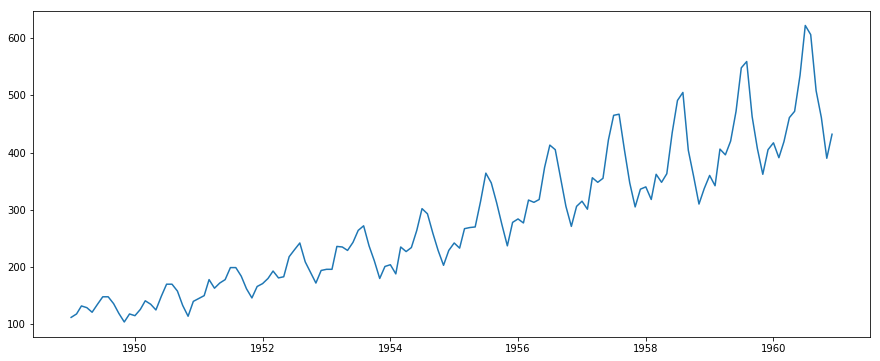

In [17]:
#Plot
plt.plot(ts)

## 2) Resampling:

- When you want a time series at a particular frequencies that you don't have it.
- Enable to have more insights into the data

- Two types of resampling are:

    - Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
    - Downsampling: Where you decrease the frequency of the samples, such as from days to months.


In [18]:
df = data['#Passengers'].resample('A').sum()

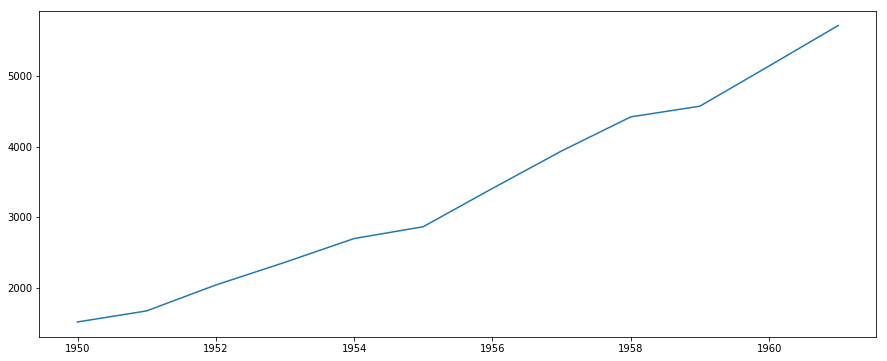

In [19]:
# Examine annual trend in the data
plt.plot(df)

In [20]:
# A second example:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts_bis= pd.Series(np.random.randn(len(rng)), index=rng)

In [21]:
ts_bis.head()

2011-01-01 00:00:00    1.174256
2011-01-01 01:00:00   -1.443509
2011-01-01 02:00:00   -1.390247
2011-01-01 03:00:00    2.175221
2011-01-01 04:00:00   -1.154576
Freq: H, dtype: float64

In [22]:
# What does asfreq do ? 
# Did we do upsampling or downsampling here  ?

converted = ts_bis.asfreq('45Min')


In [26]:
converted.head()

2011-01-01 00:00:00    1.174256
2011-01-01 01:30:00   -1.390247
2011-01-01 03:00:00    2.175221
2011-01-01 04:30:00   -1.125446
2011-01-01 06:00:00    0.224221
Freq: 90T, dtype: float64

In [23]:
# How can we deal with NaN values ?
converted = ts_bis.asfreq('45Min', method= 'pad' )

In [24]:
# What dit 'bfill do here ?'
converted = ts_bis.asfreq('90Min', method = 'bfill')

In [25]:
# What do the different methods do? Try them !
# method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}

In [38]:
# What is the difference between .resample() and .asfreq()?
#asfreq() : just upampling / downsampling 
#resample() : more general, we can do upsampling/downsampling and add some summary statistics like mean, average, sum ..etc()